In [65]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #import Matplotlib plotting interface
%matplotlib inline

wdir = ('/Users/MariaAthena/Dropbox/00 Imperial College/Network Analytics/Assignment 1')
graph_file = ('karate.txt')

G = nx.Graph()

with open(graph_file, 'r') as input:
#    [line.strip() for line in input.readlines().split(' ')]
    for line in input.readlines():
        l_stripped = line.strip(' ').split()
        G.add_edge(l_stripped[0], l_stripped[1])
        G.add_node(l_stripped[0])
        
edges = np.array(list(G.edges()))
nodes = np.array(list(G.nodes()))
Graph = nx.to_dict_of_dicts(G, nodes, edges)

In [103]:
# This dataframe is the adjacency matrix unweighted
df = nx.to_pandas_dataframe(G)

# also A, using numpy
# np_adjecency = nx.to_numpy_matrix(G)

In [105]:
# helper function for getting top 5 nodes from dataframe
def top5_nodes(df):
    items = df.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:5])

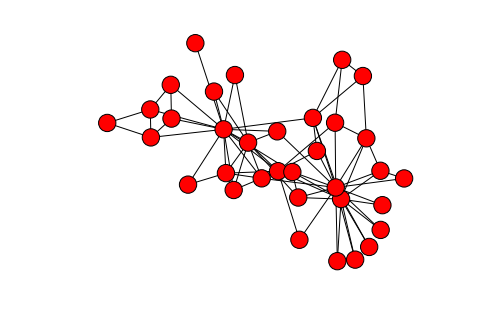

In [3]:
nx.draw(G)

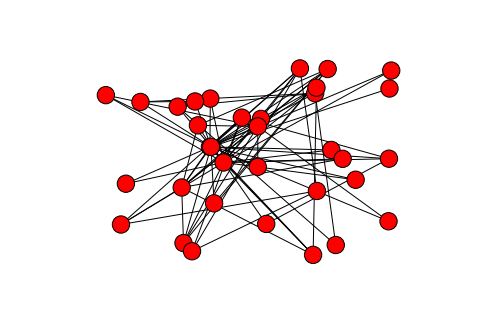

In [4]:
nx.draw_random(G)

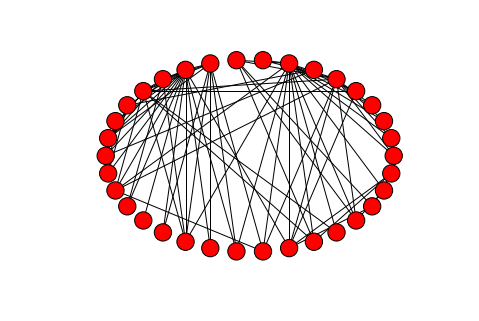

In [5]:
nx.draw_circular(G)

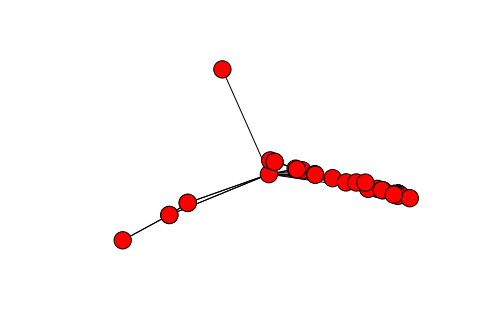

In [6]:
nx.draw_spectral(G)

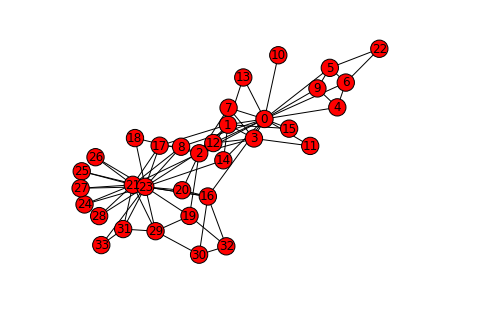

In [19]:
nx.draw_spring(G, with_labels=True)

# Q2: Exploratory Network Analysis

### 1st Measure: Average Connectedness

In [104]:
# Find the number of nodes and edges for average connectedness
N = G.order()
K = G.size()
## Average degree and the number of connected components
avg_deg = float(K) / N
print (N, K, avg_deg)

(34, 78, 2.2941176470588234)


From the above result we conclude that each node is on average connected to ~2.3 other nodes. As the average is generally a poor predictor of cetrality we will also look at other centrality measures.

### 2nd Measure: Betweenness Centrality

In [100]:
betw_centr = nx.betweenness_centrality(G)
print top5_nodes(betw_centr)

['0', '23', '21', '2', '16']


This is an indicator of a node's centrality in a network. It is equal to the number of shortest paths from all vertices to all others that pass through that node.

### 3rd Measure: Closeness Centrality

In [106]:
cl_centr = nx.closeness_centrality(G)
print top5_nodes(cl_centr)

['0', '2', '23', '16', '21']


A key node centrality measure in networks is closeness centrality. It is defined as the inverse of farness, which in turn, is the sum of distances to all other nodes.

### 4th Measure: Eigenvector Centrality

In [110]:
eig_centr = nx.eigenvector_centrality(G)
print top5_nodes(eig_centr)

['23', '0', '2', '21', '1']


Eigenvector centrality is one method of computing the "centrality", or approximate importance, of each node in a graph. The assumption is that each node's centrality is the sum of the centrality values of the nodes that it is connected to. The nodes are drawn with a radius proportional to their centrality.


# Q4: Community Detection